In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5
import astropy.units as u
import os
import numpy as np

In [2]:
fits_file =  fits.open("C:/Users/X230/Downloads/P10Hetdex-mosaic.fits")

In [4]:
type(fits_file)

astropy.io.fits.hdu.hdulist.HDUList

In [72]:
fits_file[0].header[3] # [prints header with important meta info

7564

In [62]:
fits_file[0].data #prints array or pictue in array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [63]:
wcs=WCS(fits_file[0].header)

In [68]:
coord = SkyCoord(ra = 180*u.degree,dec = 52*u.degree,frame="fk5")

In [69]:
coord

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (180., 52.)>

In [82]:
xc,yc=wcs.world_to_pixel(coord)
xc

array(-10283.58302844)

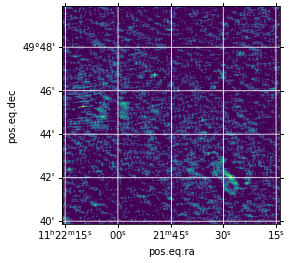

In [67]:
dx=200
ax = plt.subplot(projection=wcs)
ax.imshow(fits_file[0].data,vmin=0,vmax=0.0004,origin="lower")
ax.set(xlim=(xc-dx,xc+dx), ylim=(yc-dx,yc+dx))
ax.grid(color="white",ls="solid")
plt.show()

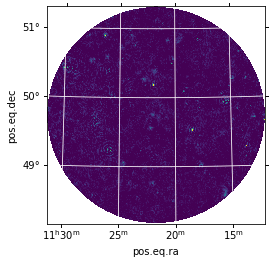

In [49]:

ax = plt.subplot(projection=wcs)
ax.imshow(fits_file[0].data,vmin=0,vmax=0.0004,origin="lower")

ax.grid(color="white",ls="solid")
plt.show()

In [111]:
ax.get_yticklabels()

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

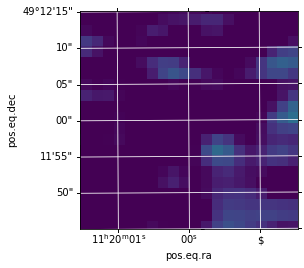

In [105]:
coord = SkyCoord(ra = 170*u.degree,dec = 49.2*u.degree,frame="fk5")
xc,yc=wcs.world_to_pixel(coord)
dx=10
ax = plt.subplot(projection=wcs)
ax.imshow(fits_file[0].data,vmin=0,vmax=0.0004,origin="lower")
ax.set(xlim=(xc-dx,xc+dx), ylim=(yc-dx,yc+dx))
ax.grid(color="white",ls="solid")
plt.show()

In [83]:
data = fits_file[0].data

In [61]:
wcs.pixel_to_world(3782,3782).ra.degree

170.43640514957374

In [31]:
catalog = fits.open("C:/Users/X230/Downloads/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits")

In [32]:
catalog[1].data

FITS_rec([('ILTJ122108.44+491340.9', 185.28516877,  0.08507008,  0.15001605, 49.22803977,  0.09402501,  0.15526944, 1.48718777, 0.05254472, 0.30204312,  1.45167724, 0.09187272, 0.30452466,  6.19600663,  0.22896105,  5.67333351,  0.19165277,  0.        ,  0.22896105,  0.        ,  0.19165277, 153.93537616, 18.49088865,   0.        , 18.49088865, 0.0529465 , 'S', 'P22Hetdex04',  188),
          ('ILTJ122107.85+491951.8', 185.28271088,  0.47393814,  0.48978082, 49.33106902,  0.47497811,  0.49078722, 0.4942069 , 0.06585488, 0.11877072,  0.84790299, 0.09754907, 0.19563589,  9.12706566,  1.35780957,  6.7693222 ,  0.807971  ,  6.87648458,  1.35780957,  3.13342882,  0.807971  ,  46.45929974, 23.10851528,  46.45929974, 23.10851528, 0.06168285, 'S', 'P22Hetdex04',  196),
          ('ILTJ122108.57+493121.9', 185.28571634,  0.53384804,  0.54796134, 49.52274915,  0.36726425,  0.38749313, 0.357484  , 0.05325748, 0.08915241,  0.43829419, 0.08748456, 0.12384514,  7.79035198,  1.33867767,  5.66738515, 

In [33]:
catalog[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  240 / length of dimension 1                          
NAXIS2  =               325694 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   29 / number of table fields                         
TTYPE1  = 'Source_Name'                                                         
TFORM1  = '24A     '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [171]:
np.where(np.char.find(catalog[1].data[:][0],"ILT")>=0)

(array([0], dtype=int64),)

In [195]:
catalog[1].data.reshape(325694,-1)

FITS_rec([[()],
          [()],
          [()],
          ...,
          [()],
          [()],
          [()]],
         dtype=(numpy.record, [('Source_Name', 'S24'), ('RA', '>f8'), ('E_RA', '>f8'), ('E_RA_tot', '>f8'), ('DEC', '>f8'), ('E_DEC', '>f8'), ('E_DEC_tot', '>f8'), ('Peak_flux', '>f8'), ('E_Peak_flux', '>f8'), ('E_Peak_flux_tot', '>f8'), ('Total_flux', '>f8'), ('E_Total_flux', '>f8'), ('E_Total_flux_tot', '>f8'), ('Maj', '>f8'), ('E_Maj', '>f8'), ('Min', '>f8'), ('E_Min', '>f8'), ('DC_Maj', '>f8'), ('E_DC_Maj', '>f8'), ('DC_Min', '>f8'), ('E_DC_Min', '>f8'), ('PA', '>f8'), ('E_PA', '>f8'), ('DC_PA', '>f8'), ('E_DC_PA', '>f8'), ('Isl_rms', '>f8'), ('S_Code', 'S1'), ('Mosaic_ID', 'S11'), ('Isl_id', '>i4')]))

In [34]:
len(catalog[1].data)

325694

In [35]:
np.where("ILTJ122108.44+491340.9" in catalog[1].data.__getitem__("Source_Name"))

(array([0], dtype=int64),)

In [36]:
catalog[1].data[0]

('ILTJ122108.44+491340.9', 185.28516877080278, 0.08507008411738805, 0.1500160490083484, 49.22803976784459, 0.09402500843402939, 0.15526943665562457, 1.4871877664600872, 0.05254471658028932, 0.3020431183603504, 1.4516772350894518, 0.09187271628868793, 0.30452465876073154, 6.196006627074602, 0.22896105350895785, 5.673333506824536, 0.19165276631465974, 0.0, 0.22896105350895785, 0.0, 0.19165276631465974, 153.93537616228963, 18.490888645800393, 0.0, 18.490888645800393, 0.052946499636163935, 'S', 'P22Hetdex04', 188)

In [49]:
catalog[1].data.__getitem__("Source_Name").shape

(325694,)

In [46]:
np.flatnonzero(np.core.defchararray.find(catalog[1].data.__getitem__("Source_Name"),"ILTJ140629.07+540108.3")!=-1)

159412

In [40]:
catalog[1].data[159412].__getitem__('RA      ')

211.62114195234994

In [41]:
catalog[1].data[159412].__getitem__('DEC     ')

54.01899341081973

In [45]:
try:
    coord = SkyCoord(ra = 211.62114195234994*u.degree,dec = 54.01899341081973*u.degree,frame="fk5")
    xc,yc=wcs.world_to_pixel(coord)
    print(xc,yc)
except:
    pass

-49417.24408987676 29276.468630450025


In [44]:
coord = SkyCoord(ra = 170*u.degree,dec = 49.2*u.degree,frame="fk5")
xc,yc=wcs.world_to_pixel(coord)
print(xc,yc)

4466.380128302742 2467.7513971543367


In [243]:
wcs.pixel_to_world(3782,3782)

<SkyCoord (ICRS): (ra, dec) in deg
    (170.43640515, 49.74844666)>